# Stacking（堆叠法）
- 来自https://www.jianshu.com/p/7fc9aa03ec11

Stacking 就是当用初始训练数据学习出若干个基学习器后，将这几个学习器的预测结果作为新的训练集，来学习一个新的学习器。Stacking 的基础层通常包括不同的学习算法，因此stacking ensemble往往是异构的



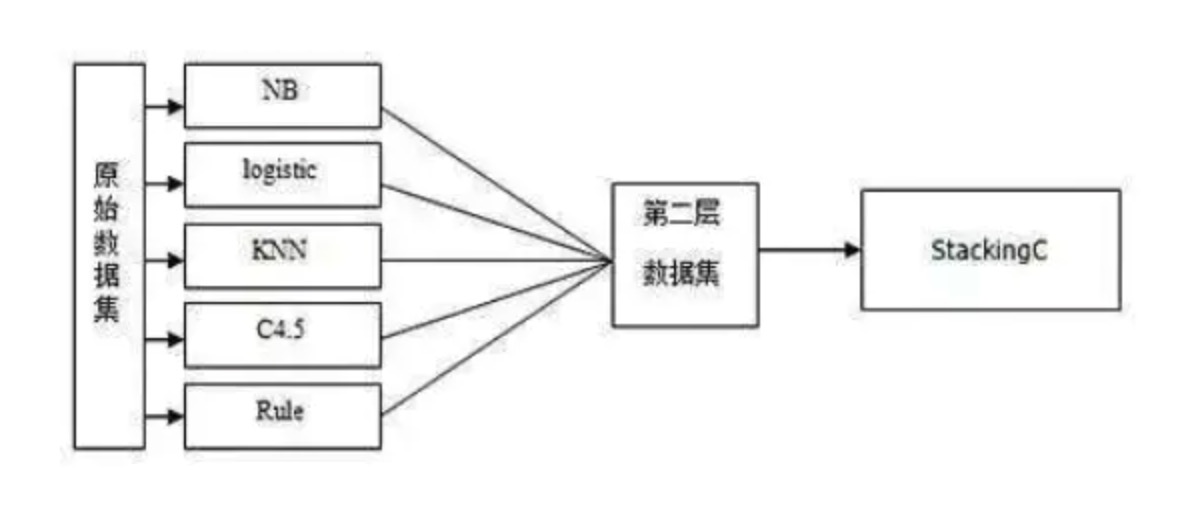

In [ ]:
#-*- coding:utf-8 -*-
'''
Stacking方法
'''
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings; warnings.filterwarnings(action='ignore')

#========================================================
#  载入iris数据集
#========================================================

iris = load_iris()
X = iris.data[:,:5]
y = iris.target

print('feature=',X)
print('target=',y)

#========================================================
#  实现Stacking集成
#========================================================

def StackingMethod(X, y):
    '''
    Stacking方法实现分类
    INPUT -> 特征, 分类标签
    '''
    scaler = StandardScaler() # 标准化转换
    scaler.fit(X)  # 训练标准化对象
    traffic_feature= scaler.transform(X)   # 转换数据集
    feature_train, feature_test, target_train, target_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

    clf1 = LogisticRegression(random_state=1)
    clf2 = RandomForestClassifier(random_state=1)
    clf3 = GaussianNB()

    sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],
                              # use_probas=True, 类别概率值作为meta-classfier的输入
                              # average_probas=False,  是否对每一个类别产生的概率值做平均
                              meta_classifier=LogisticRegression())

    sclf.fit(feature_train, target_train)

    # 模型测试
    predict_results = sclf.predict(feature_test)
    print(accuracy_score(predict_results, target_test))
    conf_mat = confusion_matrix(target_test, predict_results)
    print(conf_mat)
    print(classification_report(target_test, predict_results))

    # 5折交叉验证
    for clf, label in zip([clf1, clf2, clf3, sclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'StackingModel']):
        scores = model_selection.cross_val_score(clf, X, y, cv=5, scoring='accuracy')
        print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

    return sclf

#========================================================
#  主程序
#========================================================

if __name__ == '__main__':

    model = StackingMethod(X, y)

In [1]:
#-*- coding:utf-8 -*-
'''
Stacking方法
'''
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import ColumnSelector
from mlxtend.classifier import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings; warnings.filterwarnings(action='ignore')

#========================================================
#  载入iris数据集
#========================================================

iris = load_iris()
X = iris.data[:,:5]
y = iris.target

print('feature=',X)
print('target=',y)

#========================================================
#  实现Stacking集成
#========================================================

def StackingMethod(X, y):
    '''
    Stacking方法实现分类
    INPUT -> 特征, 分类标签
    '''
    scaler = StandardScaler() # 标准化转换
    scaler.fit(X)  # 训练标准化对象
    traffic_feature= scaler.transform(X)   # 转换数据集
    feature_train, feature_test, target_train, target_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

    pipe1 = make_pipeline(ColumnSelector(cols=(0, 1)),  
                          LogisticRegression())
    pipe2 = make_pipeline(ColumnSelector(cols=(2, 3, 4)),  
                          LogisticRegression())

    sclf = StackingClassifier(classifiers=[pipe1, pipe2],
                              meta_classifier=LogisticRegression())

    sclf.fit(feature_train, target_train)

    # 模型测试
    predict_results = sclf.predict(feature_test)
    print(accuracy_score(predict_results, target_test))
    conf_mat = confusion_matrix(target_test, predict_results)
    print(conf_mat)
    print(classification_report(target_test, predict_results))

    return sclf

#========================================================
#  主程序
#========================================================

if __name__ == '__main__':

    model = StackingMethod(X, y)

feature= [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6

IndexError: index 4 is out of bounds for axis 1 with size 4

In [2]:
# coding=utf-8
import imp
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data
y = iris.target

import pandas as pd

x = pd.DataFrame(x, columns=['s_len','s_wid','p_len','p_wid'])

from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.svm import SVC

class StackingAveragedModels(BaseEstimator, ClassifierMixin, TransformerMixin):
    def __init__(self, base_models, meta_model):
        self.base_models = base_models
        self.meta_model = meta_model

    def fit(self, X, y):

        # 训练第一级学习器
        layer1_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            model.fit(X, y)
            y_pred = model.predict(X)
            layer1_predictions[:, i] = y_pred

        # 训练第二级学习器
        self.meta_model.fit(layer1_predictions, y)
        return self

    def predict(self, X):
        temp = np.column_stack([model.predict(X) for model in self.base_models])
        return self.meta_model.predict(temp)

clf = StackingAveragedModels(base_models=[SVC(gamma='scale'),
                                          SVC(gamma='scale')],
                             meta_model=SVC(gamma='scale'))

pipe = Pipeline(steps=[
              ('Clf', clf)
              ])

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.5, random_state= 666)
pipe.fit(x_train, y_train)

print('Test accuracy is %.3f' % pipe.score(x_test, y_test))

Test accuracy is 0.973
